In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-spectra/Sample.csv
/kaggle/input/machine-learning-spectra/Train.csv
/kaggle/input/machine-learning-spectra/Test.csv


In [2]:
train=pd.read_csv('/kaggle/input/machine-learning-spectra/Train.csv')
train.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,9/12/2014,Perth,7.9,23.7,0.0,2.4,11.0,SW,33,...,71,49,1021.7,1018.4,0,1,16.5,21.8,No,0
1,1,11/27/2016,Sydney,19.6,23.5,0.0,9.8,1.7,SE,35,...,71,66,1017.8,1016.9,7,7,20.5,21.6,No,0
2,2,9/8/2012,Nuriootpa,7.9,12.6,1.6,2.6,5.8,SW,48,...,89,64,1026.0,1025.8,7,7,10.2,12.0,Yes,0
3,3,4/17/2016,Hobart,5.8,16.9,0.0,2.8,9.9,ESE,24,...,62,49,1027.5,1024.9,3,1,11.1,15.2,No,0
4,4,5/14/2012,Perth,11.3,21.8,0.0,2.0,5.9,SW,31,...,93,63,1019.5,1018.4,7,4,14.9,20.4,No,0


In [3]:
test=pd.read_csv('/kaggle/input/machine-learning-spectra/Test.csv')
test.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,10/7/2010,Nuriootpa,0.6,16.0,0.0,5.8,10.0,WSW,35,...,20,55,41,1028.1,1026.4,1,3,9.6,15.7,No
1,1,11/21/2016,Sydney,19.7,28.4,0.0,7.4,6.0,E,35,...,17,67,64,1018.4,1015.1,6,5,24.6,25.5,No
2,2,1/7/2011,AliceSprings,23.3,38.5,4.8,10.4,10.0,S,57,...,9,46,27,1001.4,997.1,5,6,29.9,37.9,Yes
3,3,5/23/2017,Watsonia,10.8,19.7,0.0,5.2,4.8,NNW,35,...,13,72,56,1017.9,1013.9,7,1,14.7,19.3,No
4,4,5/8/2011,SydneyAirport,8.9,21.8,0.0,1.6,10.1,WSW,37,...,7,61,30,1014.1,1010.5,3,3,14.1,20.5,No


In [4]:
train.isnull()


,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39494 entries, 0 to 39493
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             39494 non-null  int64  
 1   Date           39494 non-null  object 
 2   Location       39494 non-null  object 
 3   MinTemp        39494 non-null  float64
 4   MaxTemp        39494 non-null  float64
 5   Rainfall       39494 non-null  float64
 6   Evaporation    39494 non-null  float64
 7   Sunshine       39494 non-null  float64
 8   WindGustDir    39494 non-null  object 
 9   WindGustSpeed  39494 non-null  int64  
 10  WindDir9am     39494 non-null  object 
 11  WindDir3pm     39494 non-null  object 
 12  WindSpeed9am   39494 non-null  int64  
 13  WindSpeed3pm   39494 non-null  int64  
 14  Humidity9am    39494 non-null  int64  
 15  Humidity3pm    39494 non-null  int64  
 16  Pressure9am    39494 non-null  float64
 17  Pressure3pm    39494 non-null  float64
 18  Cloud9

In [6]:
#Correlation among variables
train.corr()

,Id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
Id,1.000000,0.000893,0.001981,-0.003729,0.005306,0.001909,-0.001704,-0.001821,-0.002129,0.001252,0.000108,-0.003823,-0.004130,-0.001282,-0.002944,0.002073,0.002402,0.001603
MinTemp,0.000893,1.000000,0.750628,0.110316,0.508998,0.079759,0.119163,0.111651,0.143760,-0.179071,0.067053,-0.477469,-0.496721,0.104976,0.043009,0.906441,0.728088,0.083504
MaxTemp,0.001981,0.750628,1.000000,-0.073048,0.652958,0.465534,0.037821,-0.004156,0.020530,-0.497937,-0.450379,-0.357485,-0.457421,-0.264963,-0.257127,0.893597,0.984667,-0.149983
Rainfall,-0.003729,0.110316,-0.073048,1.000000,-0.080372,-0.248326,0.108280,0.053754,0.046716,0.266187,0.281551,-0.175865,-0.133032,0.219306,0.193754,0.012211,-0.077336,0.257869
Evaporation,0.005306,0.508998,0.652958,-0.080372,1.000000,0.368985,0.206495,0.195527,0.126296,-0.553373,-0.423694,-0.300606,-0.329170,-0.202291,-0.201933,0.593891,0.632245,-0.130805
Sunshine,0.001909,0.079759,0.465534,-0.248326,0.368985,1.000000,-0.055480,-0.014882,0.026256,-0.496719,-0.625552,0.034172,-0.029692,-0.678698,-0.701019,0.291768,0.487811,-0.450176
WindGustSpeed,-0.001704,0.119163,0.037821,0.108280,0.206495,-0.055480,1.000000,0.607452,0.687159,-0.191499,-0.042176,-0.434166,-0.387583,0.089137,0.134275,0.086496,0.001499,0.232982
WindSpeed9am,-0.001821,0.111651,-0.004156,0.053754,0.195527,-0.014882,0.607452,1.000000,0.503755,-0.238080,-0.060084,-0.204183,-0.158529,0.035374,0.063989,0.057292,-0.014677,0.082054
WindSpeed3pm,-0.002129,0.143760,0.020530,0.046716,0.126296,0.026256,0.687159,0.503755,1.000000,-0.100080,0.031814,-0.296972,-0.256931,0.070924,0.043490,0.120581,-0.001969,0.090268
Humidity9am,0.001252,-0.179071,-0.497937,0.266187,-0.553373,-0.496719,-0.191499,-0.238080,-0.100080,1.000000,0.685675,0.121107,0.178943,0.438759,0.346406,-0.427202,-0.489518,0.272041


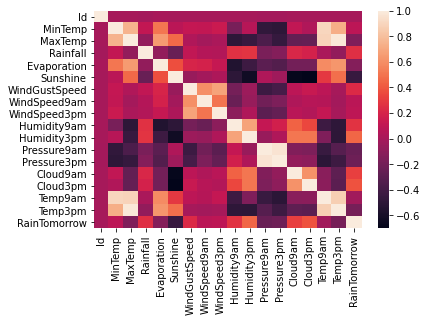

In [7]:
#Plotted the heatmap to check the collinearity among variables
import seaborn as sns
sns.heatmap(train.corr());

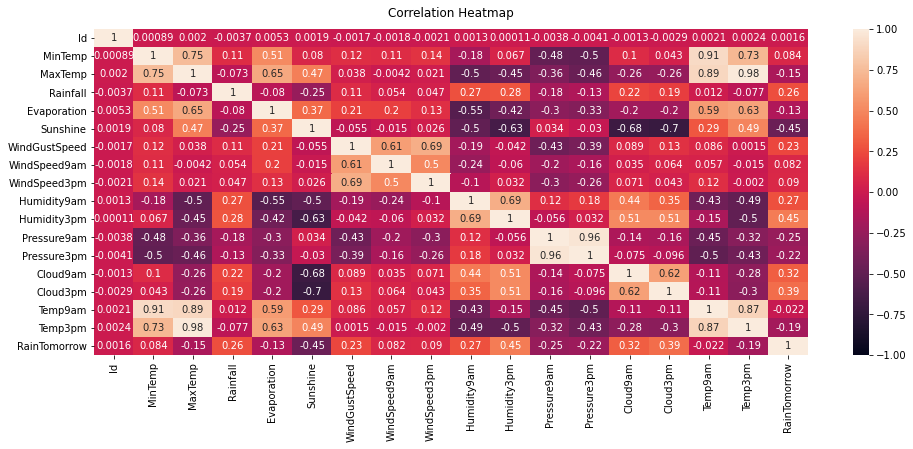

In [8]:
#Increased the font size of heatmap and labelled the diagram to have a clear understanding of the collinearity
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features.
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [9]:
cor_matrix = train.corr().abs()
print(cor_matrix)

                     Id   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Id             1.000000  0.000893  0.001981  0.003729     0.005306  0.001909   
MinTemp        0.000893  1.000000  0.750628  0.110316     0.508998  0.079759   
MaxTemp        0.001981  0.750628  1.000000  0.073048     0.652958  0.465534   
Rainfall       0.003729  0.110316  0.073048  1.000000     0.080372  0.248326   
Evaporation    0.005306  0.508998  0.652958  0.080372     1.000000  0.368985   
Sunshine       0.001909  0.079759  0.465534  0.248326     0.368985  1.000000   
WindGustSpeed  0.001704  0.119163  0.037821  0.108280     0.206495  0.055480   
WindSpeed9am   0.001821  0.111651  0.004156  0.053754     0.195527  0.014882   
WindSpeed3pm   0.002129  0.143760  0.020530  0.046716     0.126296  0.026256   
Humidity9am    0.001252  0.179071  0.497937  0.266187     0.553373  0.496719   
Humidity3pm    0.000108  0.067053  0.450379  0.281551     0.423694  0.625552   
Pressure9am    0.003823  0.477469  0.357

In [10]:
train.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,9/12/2014,Perth,7.9,23.7,0.0,2.4,11.0,SW,33,...,71,49,1021.7,1018.4,0,1,16.5,21.8,No,0
1,1,11/27/2016,Sydney,19.6,23.5,0.0,9.8,1.7,SE,35,...,71,66,1017.8,1016.9,7,7,20.5,21.6,No,0
2,2,9/8/2012,Nuriootpa,7.9,12.6,1.6,2.6,5.8,SW,48,...,89,64,1026.0,1025.8,7,7,10.2,12.0,Yes,0
3,3,4/17/2016,Hobart,5.8,16.9,0.0,2.8,9.9,ESE,24,...,62,49,1027.5,1024.9,3,1,11.1,15.2,No,0
4,4,5/14/2012,Perth,11.3,21.8,0.0,2.0,5.9,SW,31,...,93,63,1019.5,1018.4,7,4,14.9,20.4,No,0


In [11]:
train.drop('Date',axis=1,inplace=True)
test.drop('Date',axis=1,inplace=True)
train.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,Perth,7.9,23.7,0.0,2.4,11.0,SW,33,NE,...,71,49,1021.7,1018.4,0,1,16.5,21.8,No,0
1,1,Sydney,19.6,23.5,0.0,9.8,1.7,SE,35,SE,...,71,66,1017.8,1016.9,7,7,20.5,21.6,No,0
2,2,Nuriootpa,7.9,12.6,1.6,2.6,5.8,SW,48,WSW,...,89,64,1026.0,1025.8,7,7,10.2,12.0,Yes,0
3,3,Hobart,5.8,16.9,0.0,2.8,9.9,ESE,24,N,...,62,49,1027.5,1024.9,3,1,11.1,15.2,No,0
4,4,Perth,11.3,21.8,0.0,2.0,5.9,SW,31,NNE,...,93,63,1019.5,1018.4,7,4,14.9,20.4,No,0


In [12]:
train.groupby(train['Location']).count()

,Id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
AliceSprings,1575,1575,1575,1575,1575,1575,1575,1575,1575,1575,...,1575,1575,1575,1575,1575,1575,1575,1575,1575,1575
Brisbane,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056,...,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
Cairns,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,...,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748
Canberra,755,755,755,755,755,755,755,755,755,755,...,755,755,755,755,755,755,755,755,755,755
Cobar,379,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
CoffsHarbour,982,982,982,982,982,982,982,982,982,982,...,982,982,982,982,982,982,982,982,982,982
Darwin,2081,2081,2081,2081,2081,2081,2081,2081,2081,2081,...,2081,2081,2081,2081,2081,2081,2081,2081,2081,2081
Hobart,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,...,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378
Melbourne,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,...,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329


In [13]:
#Changed the encodings of the column into numerical format using LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Location'])
le.fit(test['Location'])
train['Location']=le.transform(train['Location'])
test['Location']=le.transform(test['Location'])


In [14]:
train.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,15,7.9,23.7,0.0,2.4,11.0,SW,33,NE,...,71,49,1021.7,1018.4,0,1,16.5,21.8,No,0
1,1,19,19.6,23.5,0.0,9.8,1.7,SE,35,SE,...,71,66,1017.8,1016.9,7,7,20.5,21.6,No,0
2,2,14,7.9,12.6,1.6,2.6,5.8,SW,48,WSW,...,89,64,1026.0,1025.8,7,7,10.2,12.0,Yes,0
3,3,7,5.8,16.9,0.0,2.8,9.9,ESE,24,N,...,62,49,1027.5,1024.9,3,1,11.1,15.2,No,0
4,4,15,11.3,21.8,0.0,2.0,5.9,SW,31,NNE,...,93,63,1019.5,1018.4,7,4,14.9,20.4,No,0


In [15]:
#Defined the function to convert Yes or No to 1 and 0
def zeroorone(x):
    if x=='Yes': return 1
    if x=='No' : return 0
    

In [16]:
#Converted Yes or No to zero with the help of above function
train['RainToday']=train['RainToday'].apply(zeroorone)
test['RainToday']=test['RainToday'].apply(zeroorone)


In [17]:
train.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,15,7.9,23.7,0.0,2.4,11.0,SW,33,NE,...,71,49,1021.7,1018.4,0,1,16.5,21.8,0,0
1,1,19,19.6,23.5,0.0,9.8,1.7,SE,35,SE,...,71,66,1017.8,1016.9,7,7,20.5,21.6,0,0
2,2,14,7.9,12.6,1.6,2.6,5.8,SW,48,WSW,...,89,64,1026.0,1025.8,7,7,10.2,12.0,1,0
3,3,7,5.8,16.9,0.0,2.8,9.9,ESE,24,N,...,62,49,1027.5,1024.9,3,1,11.1,15.2,0,0
4,4,15,11.3,21.8,0.0,2.0,5.9,SW,31,NNE,...,93,63,1019.5,1018.4,7,4,14.9,20.4,0,0


In [18]:
#Changed the encodings of the column into numerical format using LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['WindGustDir'])
le.fit(test['WindGustDir'])
train['WindGustDir']=le.transform(train['WindGustDir'])
test['WindGustDir']=le.transform(test['WindGustDir'])

In [19]:
#Changed the encodings of the column into numerical format using LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['WindDir9am'])
le.fit(test['WindDir9am'])
train['WindDir9am']=le.transform(train['WindDir9am'])
test['WindDir9am']=le.transform(test['WindDir9am'])

In [20]:
#Changed the encodings of the column into numerical format using LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['WindDir3pm'])
le.fit(test['WindDir3pm'])
train['WindDir3pm']=le.transform(train['WindDir3pm'])
test['WindDir3pm']=le.transform(test['WindDir3pm'])

In [21]:
train.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,15,7.9,23.7,0.0,2.4,11.0,12,33,4,...,71,49,1021.7,1018.4,0,1,16.5,21.8,0,0
1,1,19,19.6,23.5,0.0,9.8,1.7,9,35,9,...,71,66,1017.8,1016.9,7,7,20.5,21.6,0,0
2,2,14,7.9,12.6,1.6,2.6,5.8,12,48,15,...,89,64,1026.0,1025.8,7,7,10.2,12.0,1,0
3,3,7,5.8,16.9,0.0,2.8,9.9,2,24,3,...,62,49,1027.5,1024.9,3,1,11.1,15.2,0,0
4,4,15,11.3,21.8,0.0,2.0,5.9,12,31,5,...,93,63,1019.5,1018.4,7,4,14.9,20.4,0,0


In [22]:
#Read the sample data to know about the submission format
sample=pd.read_csv('/kaggle/input/machine-learning-spectra/Sample.csv')
sample

,Id,RainTomorrow
0,0,0.22
1,1,0.22
2,2,0.22
3,3,0.22
4,4,0.22
...,...,...
16921,16921,0.22
16922,16922,0.22
16923,16923,0.22
16924,16924,0.22


In [23]:
# slice from the beginning to 'bar'
X=train.loc[:, :'RainToday']
X

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,15,7.9,23.7,0.0,2.4,11.0,12,33,4,...,17,71,49,1021.7,1018.4,0,1,16.5,21.8,0
1,1,19,19.6,23.5,0.0,9.8,1.7,9,35,9,...,22,71,66,1017.8,1016.9,7,7,20.5,21.6,0
2,2,14,7.9,12.6,1.6,2.6,5.8,12,48,15,...,30,89,64,1026.0,1025.8,7,7,10.2,12.0,1
3,3,7,5.8,16.9,0.0,2.8,9.9,2,24,3,...,15,62,49,1027.5,1024.9,3,1,11.1,15.2,0
4,4,15,11.3,21.8,0.0,2.0,5.9,12,31,5,...,11,93,63,1019.5,1018.4,7,4,14.9,20.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39489,39489,16,7.0,18.4,0.0,3.6,9.4,4,43,1,...,7,53,37,1026.7,1023.6,2,6,12.5,16.8,0
39490,39490,0,16.4,32.6,0.0,6.8,10.6,9,43,5,...,24,31,16,1017.3,1013.4,1,5,24.3,31.3,0
39491,39491,25,26.6,40.5,0.0,16.6,10.7,13,57,14,...,22,16,24,1007.1,1006.3,5,3,33.3,35.4,0
39492,39492,16,9.4,27.6,0.0,6.2,10.9,15,37,13,...,26,49,44,1014.3,1010.8,1,1,23.1,25.8,0


In [24]:
#Taking the last column(target variable) with the iloc function
y=train.iloc[:,-1:]
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
39489,0
39490,0
39491,1
39492,0


In [25]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets with a validation set of 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26460, 22) (13034, 22) (26460, 1) (13034, 1)


In [26]:
#Using the various classification model for prediction
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
classifiers=[]

#model1 = xgboost.XGBClassifier()
#classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
"""
model3 = tree.DecisionTreeClassifier()
#classifiers.append(model3)
#model4 = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
#classifiers.append(model4)
"""
"""
model5=lr=LogisticRegression()
classifiers.append(model5)
model6=GaussianNB()
classifiers.append(model6)
model7=SGDClassifier()
classifiers.append(model7)
model8=KNeighborsClassifier(n_neighbors=15)
classifiers.append(model8)
model9=DecisionTreeClassifier()
classifiers.append(model9)

"""

'\nmodel5=lr=LogisticRegression()\nclassifiers.append(model5)\nmodel6=GaussianNB()\nclassifiers.append(model6)\nmodel7=SGDClassifier()\nclassifiers.append(model7)\nmodel8=KNeighborsClassifier(n_neighbors=15)\nclassifiers.append(model8)\nmodel9=DecisionTreeClassifier()\nclassifiers.append(model9)\n\n'

In [27]:
classifiers

[SVC(C=0.025, kernel='linear', random_state=55)]

In [28]:
#We are choosing the best classifiers from a range of classifiers
import numpy as np
for clf in classifiers:
    clf.fit(X_train, np.ravel(y_train))
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of SVC(C=0.025, kernel='linear', random_state=55) is 0.8454810495626822
Confusion Matrix of SVC(C=0.025, kernel='linear', random_state=55) is [[9541  630]
 [1384 1479]]


In [29]:
test.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,14,0.6,16.0,0.0,5.8,10.0,15,35,11,...,20,55,41,1028.1,1026.4,1,3,9.6,15.7,0
1,1,19,19.7,28.4,0.0,7.4,6.0,0,35,0,...,17,67,64,1018.4,1015.1,6,5,24.6,25.5,0
2,2,0,23.3,38.5,4.8,10.4,10.0,8,57,3,...,9,46,27,1001.4,997.1,5,6,29.9,37.9,1
3,3,23,10.8,19.7,0.0,5.2,4.8,6,35,3,...,13,72,56,1017.9,1013.9,7,1,14.7,19.3,0
4,4,20,8.9,21.8,0.0,1.6,10.1,15,37,7,...,7,61,30,1014.1,1010.5,3,3,14.1,20.5,0


In [30]:
#Converted it into numpy array
import numpy as np
y_pred=np.array(model2.predict(test),dtype="float32")

y_pred

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [31]:
#Merged the test dataframe with the prediction column
import pandas as pd
df = pd.DataFrame(y_pred, columns= ['RainTomorrow'])
#df = df.map({'0': 0.22, '1': 0.44})
test['RainTomorrow']=df
#df = df.map({'0': 0.22, '1': 0.44})
test['RainTomorrow'] =test['RainTomorrow'].replace([0],0.22)
test

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,14,0.6,16.0,0.0,5.8,10.0,15,35,11,...,55,41,1028.1,1026.4,1,3,9.6,15.7,0,0.22
1,1,19,19.7,28.4,0.0,7.4,6.0,0,35,0,...,67,64,1018.4,1015.1,6,5,24.6,25.5,0,0.22
2,2,0,23.3,38.5,4.8,10.4,10.0,8,57,3,...,46,27,1001.4,997.1,5,6,29.9,37.9,1,1.00
3,3,23,10.8,19.7,0.0,5.2,4.8,6,35,3,...,72,56,1017.9,1013.9,7,1,14.7,19.3,0,0.22
4,4,20,8.9,21.8,0.0,1.6,10.1,15,37,7,...,61,30,1014.1,1010.5,3,3,14.1,20.5,0,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16921,16921,17,12.9,24.5,0.0,8.0,10.4,0,35,0,...,78,57,1012.9,1010.2,6,2,16.0,23.9,0,0.22
16922,16922,20,9.4,20.5,0.4,0.8,9.7,15,44,14,...,56,32,1020.7,1018.2,1,1,13.9,19.9,0,0.22
16923,16923,2,20.6,30.5,0.0,6.8,8.2,4,35,10,...,62,70,1014.7,1011.7,3,4,28.4,28.3,0,0.22
16924,16924,19,8.3,20.9,0.0,4.4,10.0,13,33,13,...,48,41,1018.7,1016.9,3,3,11.7,17.2,0,0.22


In [32]:
#Merged the prediction column with final prediction
test=test.drop(['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday'],axis=1)
test

,Id,RainTomorrow
0,0,0.22
1,1,0.22
2,2,1.00
3,3,0.22
4,4,0.22
...,...,...
16921,16921,0.22
16922,16922,0.22
16923,16923,0.22
16924,16924,0.22


In [33]:
#Converted the dataframe to csv format
test.to_csv('My_submission.csv',index=False)
test

,Id,RainTomorrow
0,0,0.22
1,1,0.22
2,2,1.00
3,3,0.22
4,4,0.22
...,...,...
16921,16921,0.22
16922,16922,0.22
16923,16923,0.22
16924,16924,0.22
